In [438]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Underdogs

After watching many football miracles in national matches, I have decided to study on underdog teams' rate of success in two major tournaments held in 2024 summer. We will check if an individual could save some profit from betting on these underdogs! so let's dive in!

##### In this dataset, I have collected information about betting odds from the entire matches of Copa America & Euro 2024 which are saved on 'Data.csv'. I will discuss columns after loading the dataset!

In [439]:
df = pd.read_csv('./data.csv')
df

,1,2,underdog win,underdogx,underdogO0.5,handicap1,handicap1.5,handicap2,underdog1h,competition,winE,xE,O0.5E,handicap1E,handicap1.5E,handicap2E,1hE
0,germany,scotland,10.700,3.730,1.825,2.885,2.064,1.590,8.80,euro,-1.00,-1.00,0.825,-1.00,-1.00,-1.00,-1.00
1,swiss,hungary,3.855,1.730,1.570,1.300,1.180,1.031,4.60,euro,-1.00,-1.00,0.570,-1.00,-1.00,0.00,-1.00
2,spain,croatia,4.775,1.990,1.570,1.552,1.300,1.089,5.20,euro,-1.00,-1.00,-1.000,-1.00,-1.00,-1.00,-1.00
3,italy,albania,11.900,3.640,2.300,2.660,1.910,1.420,9.10,euro,-1.00,-1.00,1.300,0.00,0.91,0.42,-1.00
4,netherlands,poland,7.500,2.716,1.760,2.095,1.550,1.240,6.60,euro,-1.00,-1.00,0.760,0.00,0.55,0.24,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,england,netherlands,3.260,1.530,1.420,1.280,1.190,1.050,3.19,euro,-1.00,-1.00,0.420,0.00,0.19,0.05,-1.00
77,uruguay,colombia,3.110,1.460,1.340,1.210,1.140,1.020,4.16,copa,2.11,0.46,0.340,0.21,0.14,0.02,3.16
78,uruguay,canada,7.520,2.860,1.680,2.240,1.800,1.450,6.38,copa,-1.00,1.86,0.680,1.24,0.80,0.45,-1.00
79,spain,england,3.860,1.650,1.540,1.310,1.210,1.090,4.11,euro,-1.00,-1.00,0.540,0.00,0.21,0.09,-1.00


1. There are two columns which are named by numerics and we have to prevent them making troubles in our code! As we see, they are the first and second columns!

In [440]:
df = df.rename(columns={'1': 'favorite', '2': 'underdog'})
df

,favorite,underdog,underdog win,underdogx,underdogO0.5,handicap1,handicap1.5,handicap2,underdog1h,competition,winE,xE,O0.5E,handicap1E,handicap1.5E,handicap2E,1hE
0,germany,scotland,10.700,3.730,1.825,2.885,2.064,1.590,8.80,euro,-1.00,-1.00,0.825,-1.00,-1.00,-1.00,-1.00
1,swiss,hungary,3.855,1.730,1.570,1.300,1.180,1.031,4.60,euro,-1.00,-1.00,0.570,-1.00,-1.00,0.00,-1.00
2,spain,croatia,4.775,1.990,1.570,1.552,1.300,1.089,5.20,euro,-1.00,-1.00,-1.000,-1.00,-1.00,-1.00,-1.00
3,italy,albania,11.900,3.640,2.300,2.660,1.910,1.420,9.10,euro,-1.00,-1.00,1.300,0.00,0.91,0.42,-1.00
4,netherlands,poland,7.500,2.716,1.760,2.095,1.550,1.240,6.60,euro,-1.00,-1.00,0.760,0.00,0.55,0.24,-1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,england,netherlands,3.260,1.530,1.420,1.280,1.190,1.050,3.19,euro,-1.00,-1.00,0.420,0.00,0.19,0.05,-1.00
77,uruguay,colombia,3.110,1.460,1.340,1.210,1.140,1.020,4.16,copa,2.11,0.46,0.340,0.21,0.14,0.02,3.16
78,uruguay,canada,7.520,2.860,1.680,2.240,1.800,1.450,6.38,copa,-1.00,1.86,0.680,1.24,0.80,0.45,-1.00
79,spain,england,3.860,1.650,1.540,1.310,1.210,1.090,4.11,euro,-1.00,-1.00,0.540,0.00,0.21,0.09,-1.00


2. There are 81 rows for each match held in these tournaments & 17 columns in this dataset. Let's define each columns:

    * **favorite** : The favorite team to win the match
     
    * **underdog** : The underdog who is less likely to get a victory.
  
    * **underdog win**: The betting odd by which an individual will be awarded if the underdog wins the match!
     
    * **underdogx**: The betting odd of underdogs' double chance. The individual will win this bet if the underdog wins or even draws the match!
     
    * **underdogO0.5**: The betting odd of underdog scoring at least a goal!
     
    * **handicap1**: This bet will be won if underdog wins or draws the match. What is the difference with the 4th column? Well, if underdog loses by one goal, the money will be returned!
     
    * **handicap1**: Just like the previous one, but if underdog loses by one goal, the bet is won!
     
    * **handicap2**: The bet will be still considered as a victory if underdog is lost by one goal, and if the defeat is by two goals, your cash is returned!
 
    * **underdog1h**: Will be won if the underdog wins the first half!
     
    * **competition**: The competition in which match was held, wether Copa Amerika or the Euro!
     
    * **Next 7 columns**: These are the effected odds after the end of the match! will be -1 if the bet is lost, 0 if it is returned, and the ammount of profit if the bet is won!

Now we have to classify our matches. Let's suppose that the winning odd of the underdog has every piece of information about the desire to victory in its own essence. So the more is the winning odd, the harder it is supposed for the underdog to win the match. By calculating some summary statistics of this column, we will be able to classify our matches by the difficulty!

In [441]:
df['underdog win'].describe()

count    81.000000
mean      6.913963
std       4.239826
min       2.733000
25%       3.970000
50%       5.630000
75%       8.400000
max      29.000000
Name: underdog win, dtype: float64

By summing the effective odds of each column, we can recognize which types of bet are more likely to provide us benefits and which bets are not, and therefore, we are able to drop those columns!

In [442]:
effectives = ['winE'	, 'xE'	, 'O0.5E'	, 'handicap1E'	, 'handicap1.5E'	, 'handicap2E'	, '1hE']
df[effectives].sum()

winE           -18.5550
xE               6.0840
O0.5E           -1.0550
handicap1E       6.8700
handicap1.5E     2.9808
handicap2E       1.4070
1hE             14.7100
dtype: float64

We can conclude that betting on the underdog team to win will cause us a huge loss of the money! I don't think so if there is a hope for saving that in our dataset! Since we train our model on the 'underdog win' column, we do not remove that!

In [443]:
df.drop(columns=['winE'], inplace=True)
effectives.remove('winE')

Now I want to create some visualizations on my data, to see how bets are distributed. First I need to clean and process my dataset so I could have the bets' results in boolean values!

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   favorite      81 non-null     object 
 1   underdog      81 non-null     object 
 2   underdog win  81 non-null     float64
 3   underdogx     81 non-null     float64
 4   underdogO0.5  81 non-null     float64
 5   handicap1     81 non-null     float64
 6   handicap1.5   81 non-null     float64
 7   handicap2     81 non-null     float64
 8   underdog1h    81 non-null     float64
 9   competition   81 non-null     object 
 10  xE            81 non-null     float64
 11  O0.5E         81 non-null     float64
 12  handicap1E    81 non-null     float64
 13  handicap1.5E  81 non-null     float64
 14  handicap2E    81 non-null     float64
 15  1hE           81 non-null     float64
dtypes: float64(13), object(3)
memory usage: 10.3+ KB


In [445]:
df[['xEB', 'O0.5EB', 'handicap1EB', 'handicap1.5EB', 'handicap2EB', '1hEB']] = df[['xE', 'O0.5E', 'handicap1E', 'handicap1.5E', 'handicap2E', '1hE']] >= 0

Now that we have added some boolean columns to our dataset, we are ready to make some visualizations with this bets!

/tmp/ipykernel_20229/3363322206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
/tmp/ipykernel_20229/3363322206.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Loss', 'Win'])


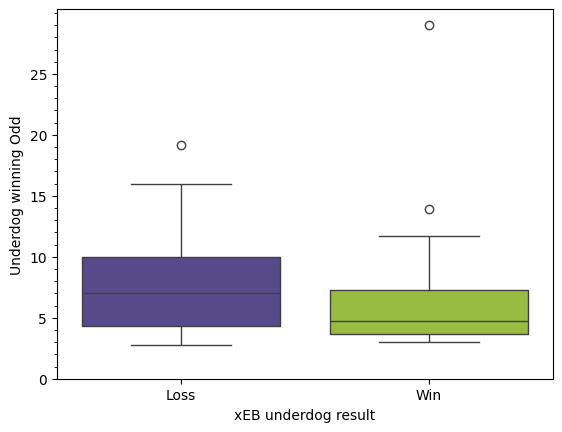

/tmp/ipykernel_20229/3363322206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
/tmp/ipykernel_20229/3363322206.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Loss', 'Win'])


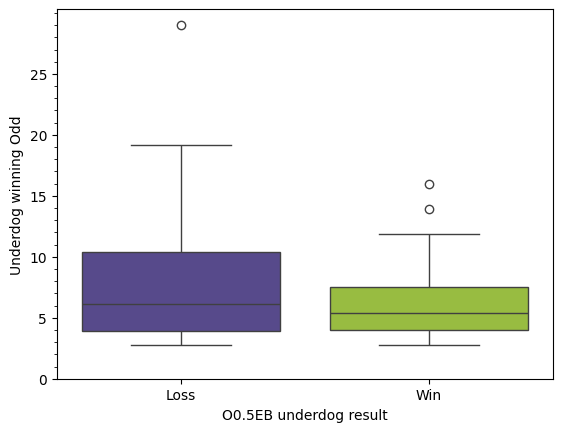

/tmp/ipykernel_20229/3363322206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
/tmp/ipykernel_20229/3363322206.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Loss', 'Win'])


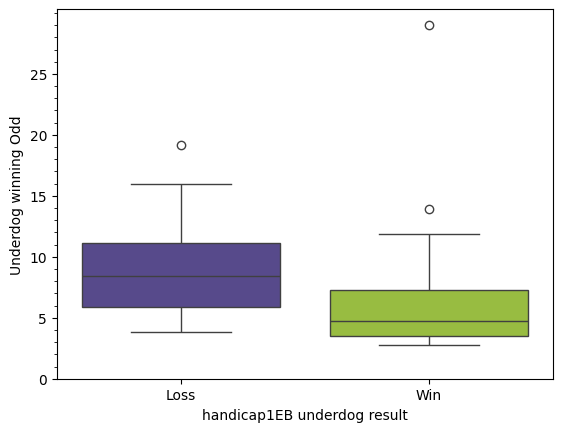

/tmp/ipykernel_20229/3363322206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
/tmp/ipykernel_20229/3363322206.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Loss', 'Win'])


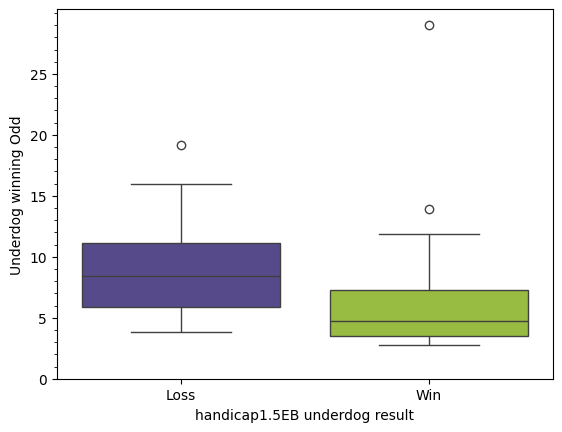

/tmp/ipykernel_20229/3363322206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
/tmp/ipykernel_20229/3363322206.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Loss', 'Win'])


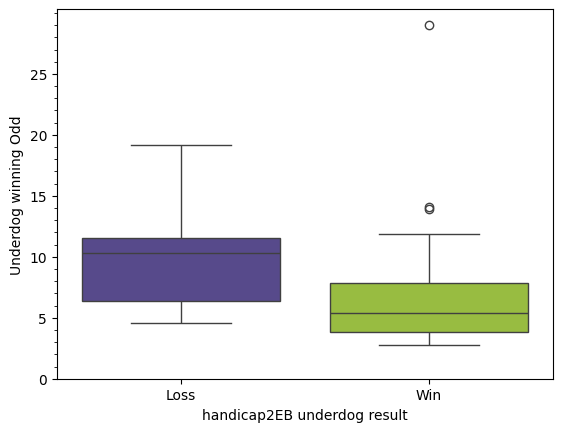

/tmp/ipykernel_20229/3363322206.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
/tmp/ipykernel_20229/3363322206.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Loss', 'Win'])


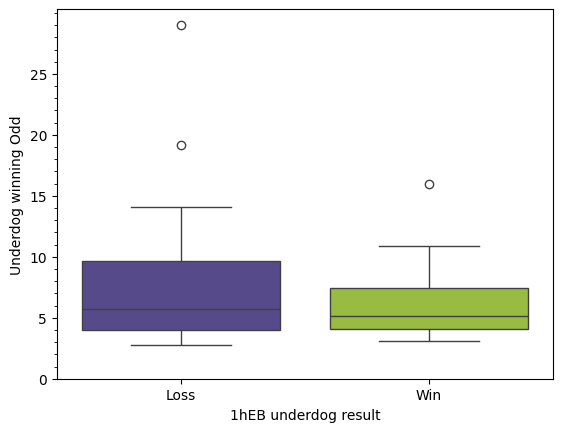

<Figure size 640x480 with 0 Axes>

In [446]:
from matplotlib.ticker import AutoMinorLocator

booleans = ['xEB', 'O0.5EB', 'handicap1EB', 'handicap1.5EB', 'handicap2EB', '1hEB']
for i in booleans:
    ax = plt.axes()
    my_pal = {'True': '#a1d02d', 'False': '#503f96'}
    sns.boxplot(data = df, x= df[i], y = df['underdog win'], palette=my_pal)
    ax.set_yticks(range(0,30, 5) )
    minor_locator = AutoMinorLocator(5)
    plt.gca().yaxis.set_minor_locator(minor_locator)
    ax.set_xlabel(f'{i} underdog result')
    ax.set_ylabel('Underdog winning Odd')
    ax.set_xticklabels(['Loss', 'Win'])
    plt.show()
    plt.clf()




It seems that in most cases, It's beneficial to bet on matches with the winning odd of underdog being less than 8. We use SVM machine learning algorithm to find out how predictable each betting option is!

In [447]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
for i in range(len(booleans)):
    model = SVC(C=2, random_state=4)
    X = pd.DataFrame(df['underdog win'])
    y = np.array(df[booleans[i]])
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{booleans[i]} predictability score with svm:', np.mean(scores))
    




xEB predictability score with svm: 0.6176470588235294
O0.5EB predictability score with svm: 0.5301470588235294
handicap1EB predictability score with svm: 0.7029411764705882
handicap1.5EB predictability score with svm: 0.7029411764705882
handicap2EB predictability score with svm: 0.8764705882352942
1hEB predictability score with svm: 0.8029411764705883


Okay, but we have to compare these results with the actual distribution of each column!

In [448]:
for i in booleans:
    print(df[i].value_counts(normalize=True))

xEB
False    0.54321
True     0.45679
Name: proportion, dtype: float64
O0.5EB
True     0.580247
False    0.419753
Name: proportion, dtype: float64
handicap1EB
True     0.716049
False    0.283951
Name: proportion, dtype: float64
handicap1.5EB
True     0.716049
False    0.283951
Name: proportion, dtype: float64
handicap2EB
True     0.876543
False    0.123457
Name: proportion, dtype: float64
1hEB
False    0.802469
True     0.197531
Name: proportion, dtype: float64


So we see that SVM doesn't make better predictions than just putting a bet on every instance of the dataset! But we have just compared the boolean columns, we have to check if our benefit will increase by this classifications!

In [449]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X, y)
predicted


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [450]:
for i in effectives:
    df[f'{i}p'] = np.nan
df

,favorite,underdog,underdog win,underdogx,underdogO0.5,handicap1,handicap1.5,handicap2,underdog1h,competition,...,handicap1EB,handicap1.5EB,handicap2EB,1hEB,xEp,O0.5Ep,handicap1Ep,handicap1.5Ep,handicap2Ep,1hEp
0,germany,scotland,10.700,3.730,1.825,2.885,2.064,1.590,8.80,euro,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1,swiss,hungary,3.855,1.730,1.570,1.300,1.180,1.031,4.60,euro,...,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN
2,spain,croatia,4.775,1.990,1.570,1.552,1.300,1.089,5.20,euro,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,italy,albania,11.900,3.640,2.300,2.660,1.910,1.420,9.10,euro,...,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
4,netherlands,poland,7.500,2.716,1.760,2.095,1.550,1.240,6.60,euro,...,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,england,netherlands,3.260,1.530,1.420,1.280,1.190,1.050,3.19,euro,...,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
77,uruguay,colombia,3.110,1.460,1.340,1.210,1.140,1.020,4.16,copa,...,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN
78,uruguay,canada,7.520,2.860,1.680,2.240,1.800,1.450,6.38,copa,...,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
79,spain,england,3.860,1.650,1.540,1.310,1.210,1.090,4.11,euro,...,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN


Ugh, we have to stratify our dataset, because having more false values leads to a lazy model which predicts all instances Falsy!

In [451]:
from sklearn.model_selection import train_test_split
predictions = []
odds_test = []
for i in range(len(booleans)):
    X = pd.DataFrame(df['underdog win'])
    y = np.array(df[booleans[i]])
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25)
    model = SVC(C=2, random_state=4)
    model.fit(X_train, y_train)
    scores = model.score(X_test, y_test)
    print(f'{booleans[i]} predictability score with svm:', np.mean(scores))
    odds_test.append(X_test)
    predictions.append([odds_test[i].index, model.predict(X_test)])
    print(predictions)
    for k in range(len(predictions[i][0])):
        df[f'{effectives[i]}p'].iloc[predictions[i][0][k]] = predictions[i][1][k]
    



xEB predictability score with svm: 0.6190476190476191
[[Index([58, 53, 64, 45, 73, 65, 66, 33, 61, 62, 77, 79, 80,  0, 46, 60, 17, 26,
       51, 14, 54],
      dtype='int64'), array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False])]]
O0.5EB predictability score with svm: 0.5714285714285714
[[Index([58, 53, 64, 45, 73, 65, 66, 33, 61, 62, 77, 79, 80,  0, 46, 60, 17, 26,
       51, 14, 54],
      dtype='int64'), array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True, False])], [Index([73, 25, 15, 70, 29, 71, 36, 48, 56, 50, 79, 22, 60, 41, 34, 49, 76, 16,
        7, 27, 74],
      dtype='int64'), array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])]]
handicap

/tmp/ipykernel_20229/2877901358.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[f'{effectives[i]}p'].iloc[predictions[i][0][k]] = predictions[i][1][k]
/tmp/ipykernel_20229/2877901358.py:16: SettingWithCopyWarning: 
A value is trying 

In [452]:
df

,favorite,underdog,underdog win,underdogx,underdogO0.5,handicap1,handicap1.5,handicap2,underdog1h,competition,...,handicap1EB,handicap1.5EB,handicap2EB,1hEB,xEp,O0.5Ep,handicap1Ep,handicap1.5Ep,handicap2Ep,1hEp
0,germany,scotland,10.700,3.730,1.825,2.885,2.064,1.590,8.80,euro,...,False,False,False,False,False,NaN,NaN,True,True,False
1,swiss,hungary,3.855,1.730,1.570,1.300,1.180,1.031,4.60,euro,...,False,False,True,False,NaN,NaN,NaN,NaN,True,NaN
2,spain,croatia,4.775,1.990,1.570,1.552,1.300,1.089,5.20,euro,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,italy,albania,11.900,3.640,2.300,2.660,1.910,1.420,9.10,euro,...,True,True,True,False,NaN,NaN,NaN,NaN,True,NaN
4,netherlands,poland,7.500,2.716,1.760,2.095,1.550,1.240,6.60,euro,...,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,england,netherlands,3.260,1.530,1.420,1.280,1.190,1.050,3.19,euro,...,True,True,True,False,NaN,True,NaN,NaN,NaN,NaN
77,uruguay,colombia,3.110,1.460,1.340,1.210,1.140,1.020,4.16,copa,...,True,True,True,True,True,NaN,True,NaN,NaN,False
78,uruguay,canada,7.520,2.860,1.680,2.240,1.800,1.450,6.38,copa,...,True,True,True,False,NaN,NaN,True,NaN,NaN,False
79,spain,england,3.860,1.650,1.540,1.310,1.210,1.090,4.11,euro,...,True,True,True,False,True,True,NaN,True,NaN,False


In [453]:

for i in effectives:
  print(i, ' : ', df[df[f'{i}p'] == True][f'{i}'].sum().item(), 'number of options predicted to win: ', len(df[df[f'{i}p'] == True]))
  

xE  :  -0.15399999999999991 number of options predicted to win:  14
O0.5E  :  -1.782 number of options predicted to win:  21
handicap1E  :  1.9869999999999999 number of options predicted to win:  18
handicap1.5E  :  -2.096 number of options predicted to win:  18
handicap2E  :  -1.1009999999999995 number of options predicted to win:  21
1hE  :  0.0 number of options predicted to win:  0


Since we had no win prediction for a team in first half it would be zero!
You see that the only positive prediction in the case with svm prediction is the handicap1 option!
What if we place a bet on all 81 matches in each option?

In [454]:
for i in effectives:
    print(i, ' : ', df[i].sum().item())

xE  :  6.084
O0.5E  :  -1.0549999999999997
handicap1E  :  6.869999999999998
handicap1.5E  :  2.980800000000001
handicap2E  :  1.4070000000000005
1hE  :  14.71


What if we only bet on games in the winning odd range 4 to 8.5 which we found out on visualizations?

In [472]:
for i in effectives:
    print(i, ' : ', df.loc[(4 < df['underdog win'] )&(df['underdog win'] < 8.5)][i].sum())

xE  :  0.7219999999999995
O0.5E  :  2.48
handicap1E  :  1.199
handicap1.5E  :  2.035
handicap2E  :  1.8189999999999997
1hE  :  12.620000000000001


# Conclusion

Football's unpredictability shows us that it is not beneficial to remove one-sided matches on our more risky bets (handicap1, 1st half win, double chance), but in some other options like handicap2 or Over 0.5 goals by the underdog, filtering our dataset to the low winning-odd underdogs (4 to 8.5 in our case) will help us result in a higher benefit by placing bets on underdogs!